In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [47]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# 1. 理解数据

In [48]:
print('First 5 rows of our dataset:')
train_df.head()

First 5 rows of our dataset:


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [49]:
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns')

There are 3116945 rows and 22 columns


In [50]:
print('Column names and data type of each column:')
train_df.dtypes

Column names and data type of each column:


id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [51]:
print(f'There are {train_df.duplicated().sum()} duplicate rows in the train dataset.')


There are 0 duplicate rows in the train dataset.


In [52]:
print('Checking missing values in each volumn:')

train_df.isnull().sum()

Checking missing values in each volumn:


id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

<Axes: title={'center': 'Visualizing missing values'}>

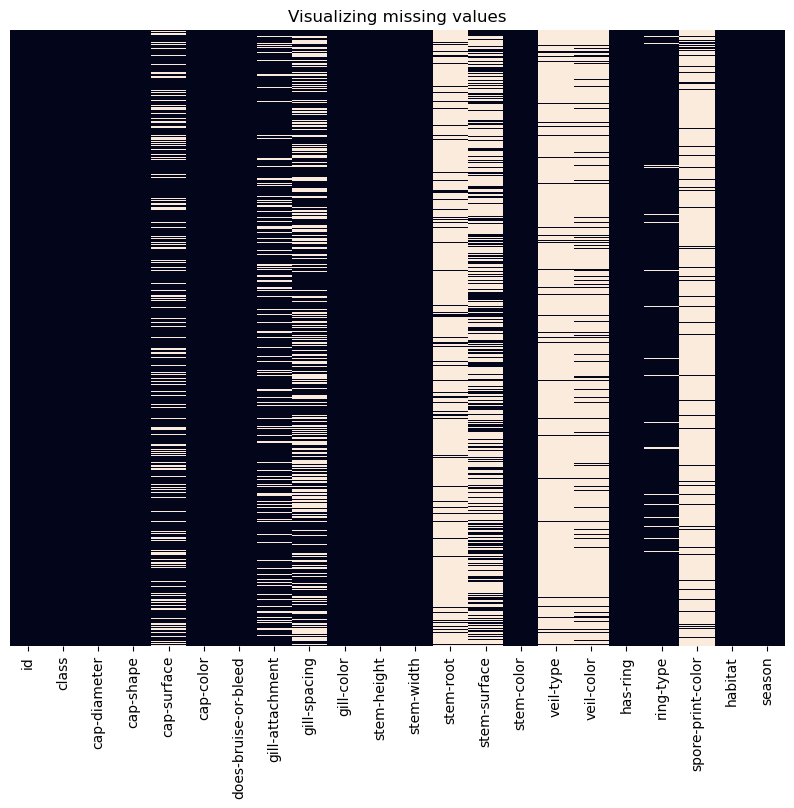

In [53]:
plt.figure(figsize=(10,8))
plt.title('Visualizing missing values')
sns.heatmap(
    train_df.isnull(),
    cbar = False,
    yticklabels = False
)

# 2. 数据清洗 

In [54]:
test_df_cleaned = test_df.copy()

train_df_cleaned = train_df.copy()
train_df_cleaned = train_df_cleaned.drop('id', axis=1)
target_column = 'class'
categorical_columns = train_df_cleaned.select_dtypes(include=['object']).columns.drop(target_column)
numerical_columns = train_df_cleaned.select_dtypes(exclude=['object']).columns
print('Target column: ', target_column)
print('\nCategorical columns: ', categorical_columns.tolist())
print('\nNumerical columns: ', numerical_columns.tolist())

Target column:  class

Categorical columns:  ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

Numerical columns:  ['cap-diameter', 'stem-height', 'stem-width']


## 2.1 merge too infrequent cols in categorical columns

In [55]:
for col in categorical_columns:
    num_unique = train_df_cleaned[col].nunique()
    print(f" '{col}' has {num_unique} unique categories. ")

 'cap-shape' has 74 unique categories. 
 'cap-surface' has 83 unique categories. 
 'cap-color' has 78 unique categories. 
 'does-bruise-or-bleed' has 26 unique categories. 
 'gill-attachment' has 78 unique categories. 
 'gill-spacing' has 48 unique categories. 
 'gill-color' has 63 unique categories. 
 'stem-root' has 38 unique categories. 
 'stem-surface' has 60 unique categories. 
 'stem-color' has 59 unique categories. 
 'veil-type' has 22 unique categories. 
 'veil-color' has 24 unique categories. 
 'has-ring' has 23 unique categories. 
 'ring-type' has 40 unique categories. 
 'spore-print-color' has 32 unique categories. 
 'habitat' has 52 unique categories. 
 'season' has 4 unique categories. 


In [56]:
for col in categorical_columns:
    print(f"\nTop10 value counts in '{col}':\n{train_df_cleaned[col].value_counts().head(10)}")


Top10 value counts in 'cap-shape':
cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
Name: count, dtype: int64

Top10 value counts in 'cap-surface':
cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
Name: count, dtype: int64

Top10 value counts in 'cap-color':
cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
Name: count, dtype: int64

Top10 value counts in 'does-bruise-or-bleed':
does-bruise-or-bleed
f    2569743
t     547085
w         14
c         11
h          9
b          7
y          7
a          7
x          7
s          6
Name: count, dtype: int64

Top10 value counts in 'gill-attachment':
gill-attachment
a    646034
d    589236
x    360878
e    301858
s    295439
p    279110
f    119953
c        74
u        56
w        3

😱 有一些值太少了， 我们处理的方法是： 合并到一个unknown

In [57]:
def replace_infrequent_categories(df, col, threshold = 70):
    value_counts = df[col].value_counts()
    infrequent = value_counts[value_counts < threshold].index
    df[col] = df[col].apply(lambda x: 'Unknown' if x in infrequent else x)
    return df
for col in categorical_columns:
    train_df_cleaned = replace_infrequent_categories(train_df_cleaned, col)
    test_df_cleaned = replace_infrequent_categories(test_df_cleaned, col)
print('After replacement:')
for col in categorical_columns:
    num_unique = train_df_cleaned[col].nunique()
    print(f"'{col}' has {num_unique} unique categories.")

After replacement:
'cap-shape' has 8 unique categories.
'cap-surface' has 14 unique categories.
'cap-color' has 13 unique categories.
'does-bruise-or-bleed' has 3 unique categories.
'gill-attachment' has 9 unique categories.
'gill-spacing' has 4 unique categories.
'gill-color' has 13 unique categories.
'stem-root' has 6 unique categories.
'stem-surface' has 9 unique categories.
'stem-color' has 14 unique categories.
'veil-type' has 2 unique categories.
'veil-color' has 7 unique categories.
'has-ring' has 3 unique categories.
'ring-type' has 10 unique categories.
'spore-print-color' has 8 unique categories.
'habitat' has 9 unique categories.
'season' has 4 unique categories.


## 2.2 filling missing values in Numerical columns
- 如果偏态分布（非对称），用median
- 如果对称分布，用mean


In [58]:
print('The skeness of columns:')
print(train_df_cleaned[numerical_columns].skew())

The skeness of columns:
cap-diameter    3.972609
stem-height     1.926682
stem-width      1.235427
dtype: float64


In [59]:
medians = train_df_cleaned[numerical_columns].median()
train_df_cleaned[numerical_columns] = train_df_cleaned[numerical_columns].fillna(medians)
test_df_cleaned[numerical_columns] = test_df_cleaned[numerical_columns].fillna(medians)
print('所有的数值列都是偏态分布，用median填充')

所有的数值列都是偏态分布，用median填充


## 2.3 unkown 填充missing values in Categorical columns

In [60]:
train_df_cleaned[categorical_columns] = train_df_cleaned[categorical_columns].fillna('Unknown')
test_df_cleaned[categorical_columns] = test_df_cleaned[categorical_columns].fillna('Unknown')

## 2.4 重新检测，丢掉重复row

In [65]:
print("There are {} duplicates in train dataset.".format(train_df_cleaned.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(test_df_cleaned.duplicated().sum()))
train_df_cleaned = train_df_cleaned.drop_duplicates()
print('Drop them')

There are 2 duplicates in train dataset.
There are 0 duplicates in test dataset.
Drop them


# 3. explore data 

## 3.1 Numerical feature 分布

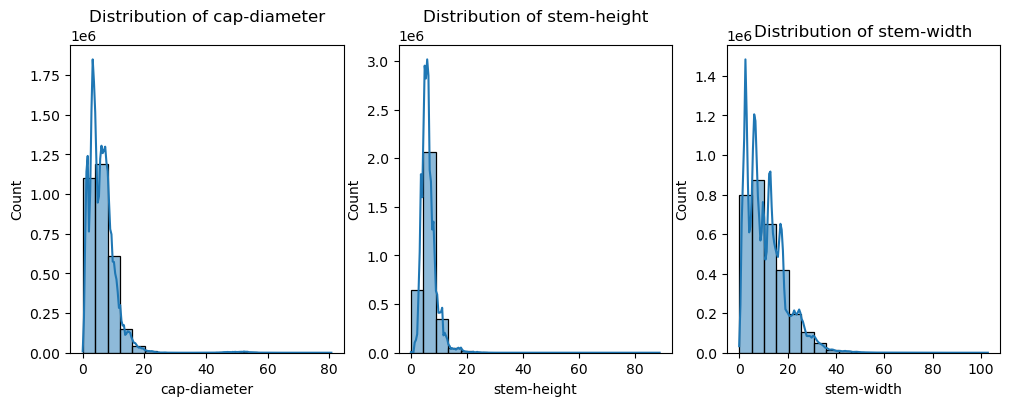

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize = (12, 4))
for col, ax in zip(numerical_columns, axes):
    sns.histplot(
        data=train_df_cleaned,
        x=col,
        kde=True,
        bins=20,
        ax=ax
    )
    ax.set_title(f'Distribution of {col}')
fig.tight_layout()

😅 
- 数值特征都是右尾分布，不是正态分布！！这回影响到模型的选择。
- 有些过高的值可能是异常的， 需要处理

## 3.2 Categorical feature 分布

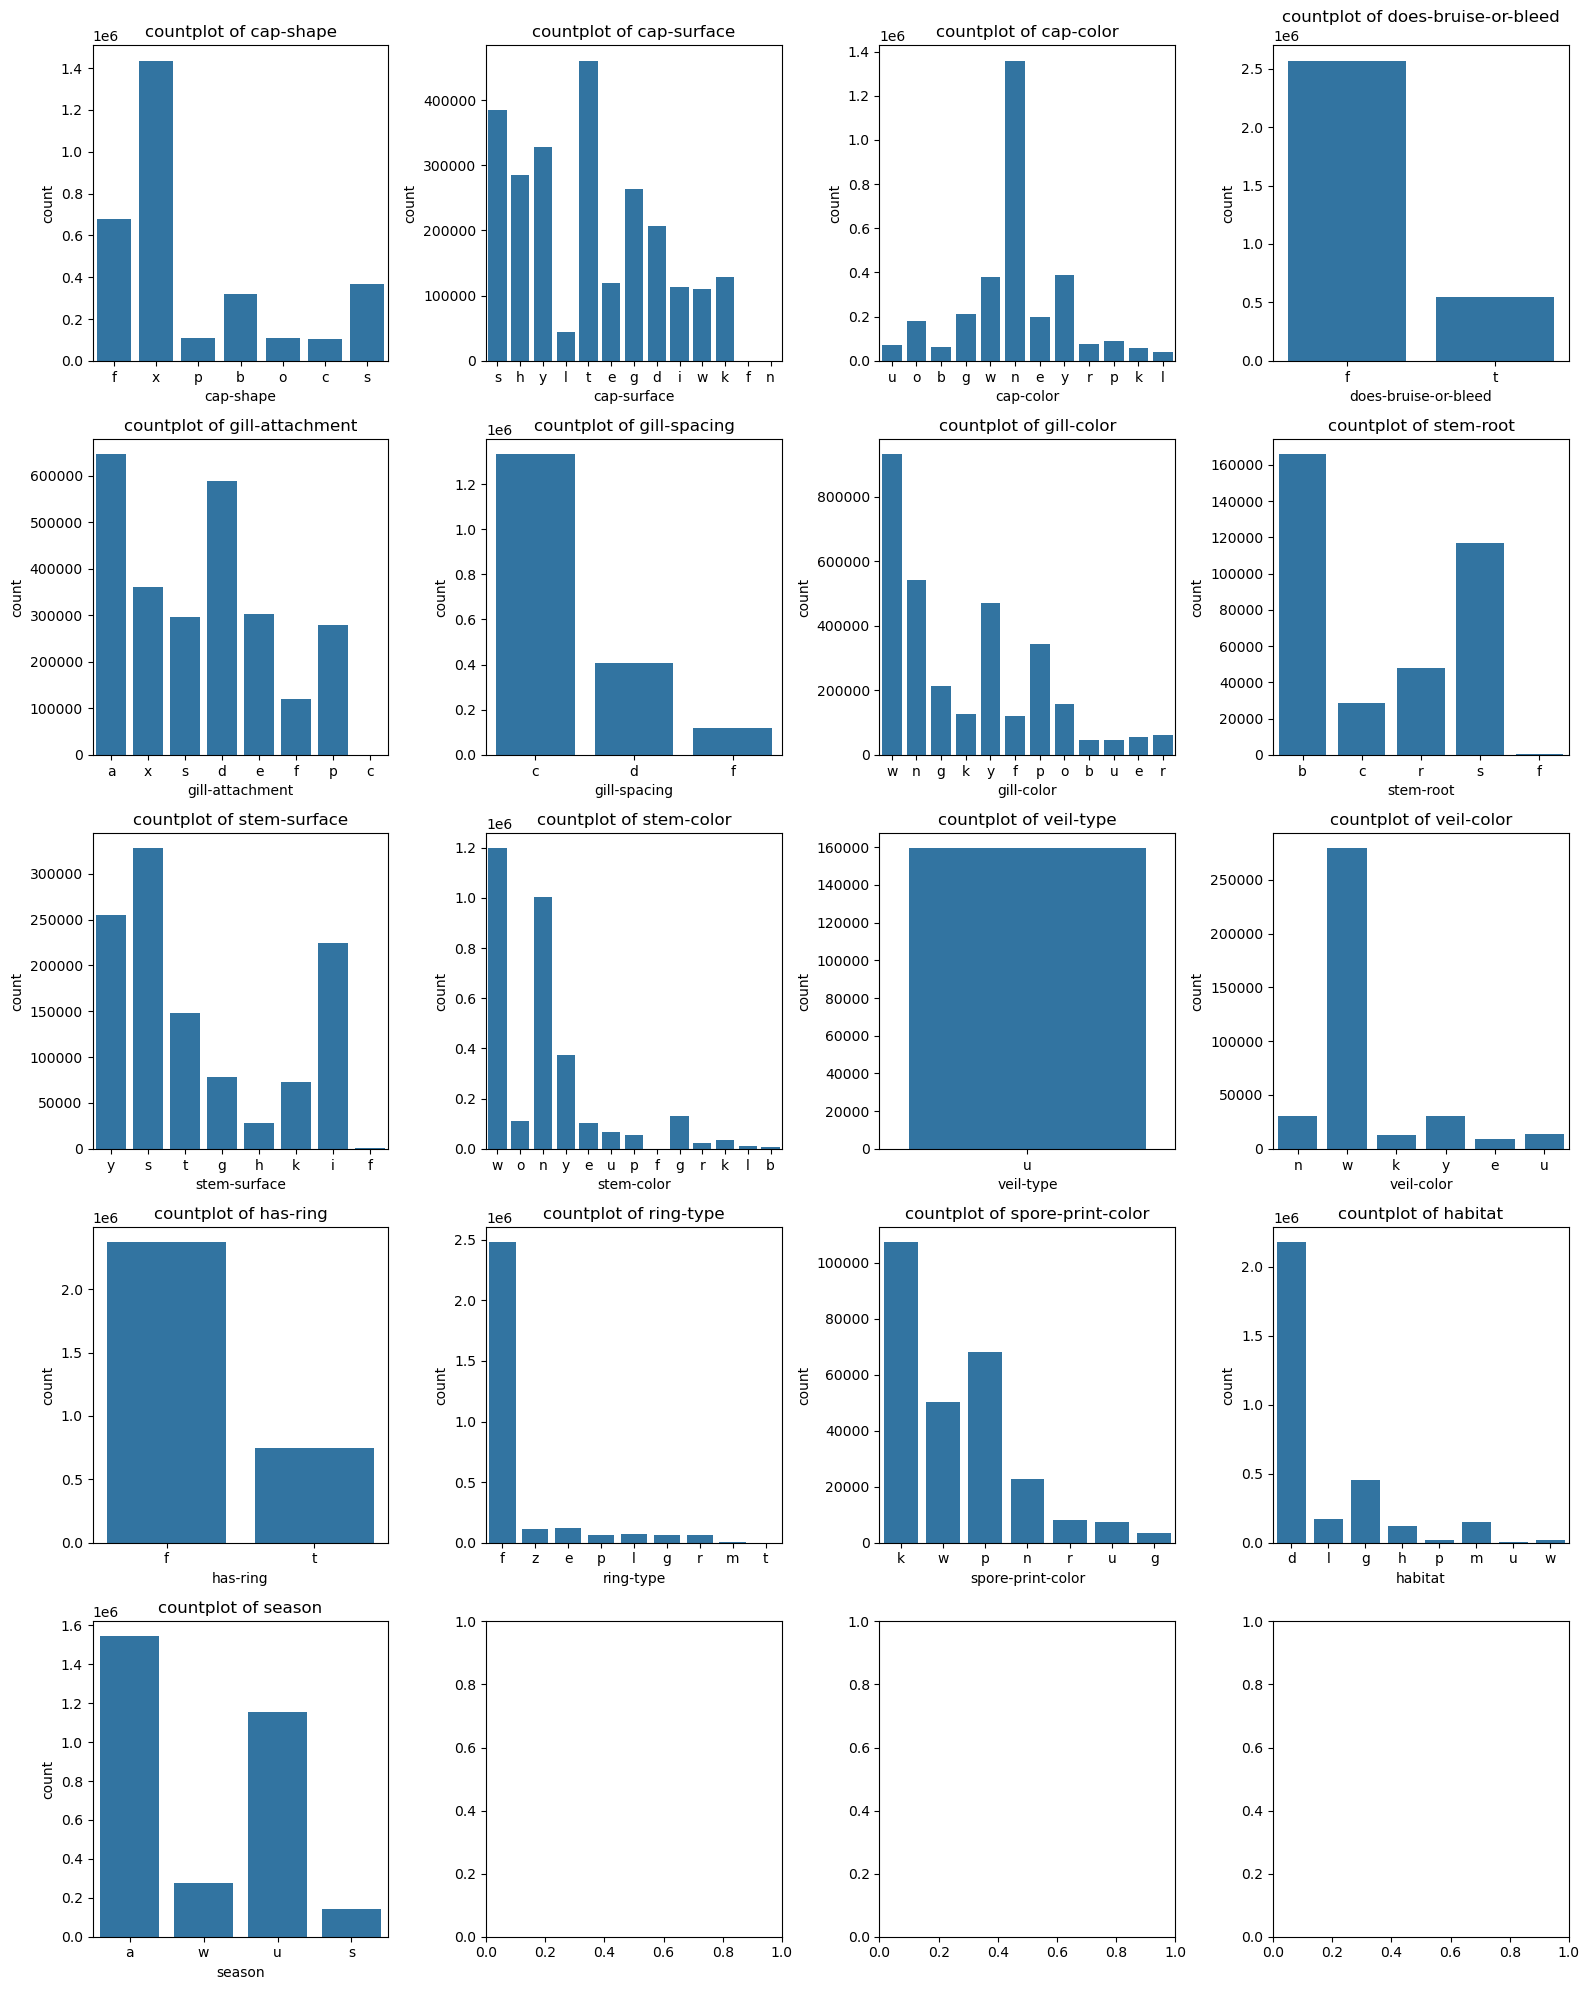

In [82]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize = (16, 20))
ax_index = 0
for col in categorical_columns:
    # exclude unknown
    filter_data = train_df_cleaned.loc[train_df_cleaned[col] != 'Unknown']
    ax= axes.ravel()[ax_index]
    sns.countplot(
        data=filter_data,
        x = col,
        ax = ax
    )
    ax.set_title(f'countplot of {col}')
    ax_index+=1
fig.tight_layout()

## 3.3 correlations of numerical feature

Text(0.5, 0.98, 'Pairplot of numerical features')

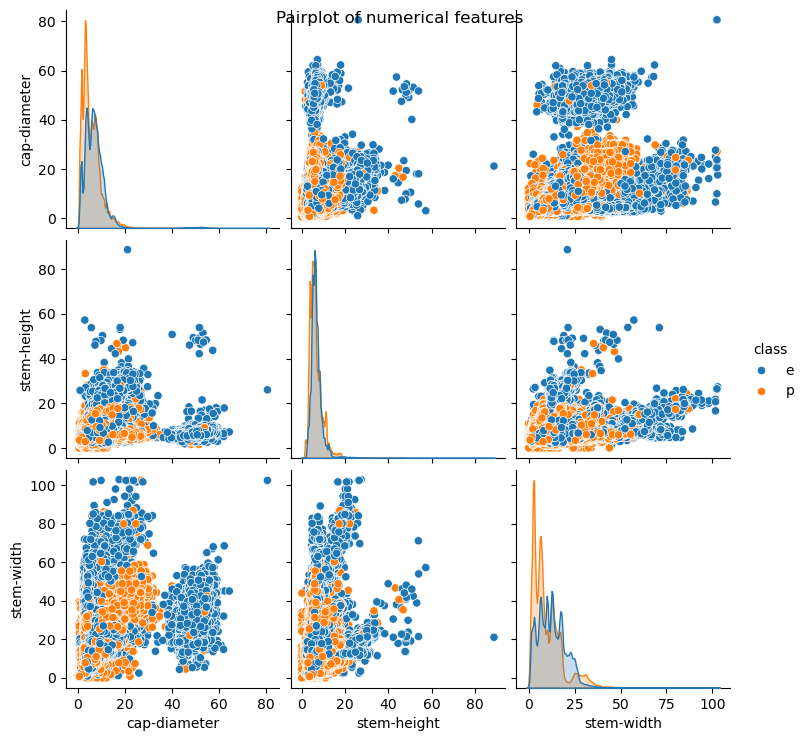

In [88]:
pairplot = sns.pairplot(
    data=train_df_cleaned,
    hue='class'
)
pairplot.figure.suptitle('Pairplot of numerical features')

可以看到有一些趋势， 如：
- 在左下角的图中，有毒的蘑菇似乎有更小的cap-diameter和更小的stem-width

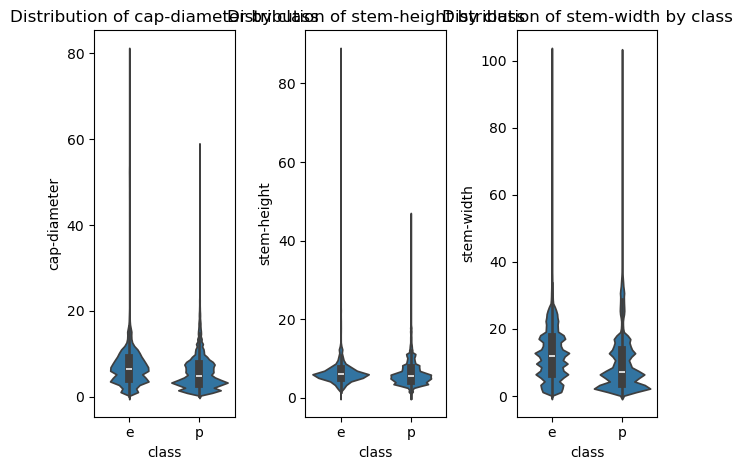

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns))
for col, ax in zip(numerical_columns, axes):
    sns.violinplot(
        data=train_df_cleaned,
        x='class',
        y=col,
        ax=ax
    )
    ax.set_title(f'Distribution of {col} by class')
fig.tight_layout()

小提琴图 进一步展示了同一个特征值对于不同类标签的发散程度

## 3.4 correlations of categorical features